In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the training dataset
training_data_path = 'crossroads-classic-analytics-challenge-24/training_data_clean.csv'
training_data = pd.read_csv(training_data_path)
# Load the test dataset
test_data_path = 'crossroads-classic-analytics-challenge-24/DIWBB_Test.csv'
test_data = pd.read_csv(test_data_path)

/apps/cent7/jupyterhub/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = training_data
# Count occurrences of each CustomerID and assign it to a new column 'VisitCount'
df['VisitCount'] = df.groupby('CustomerID')['CustomerID'].transform('count')

# Display the DataFrame to verify the new column
print(df.head())

   RecordID  ChampionshipYear  CustomerID CustomerCity CustomerState  \
0         4              2022      757758   Huntsville            TX   
1        14              2022      574752        Salem            OR   
2        20              2022      741837        (UNK)           UNK   
3        21              2022      237618        (UNK)           UNK   
4        23              2022      799761        (UNK)           UNK   

  CustomerZipCode CustomerInstitutionAffinity IsCustomerInNCAAMembership  \
0           77340                       (UNK)                         No   
1           97304                       (UNK)                         No   
2           (UNK)                       (UNK)                         No   
3           (UNK)                       (UNK)                         No   
4           (UNK)                       (UNK)                         No   

  HasCustomerClickedOrOpenedEmailsSixMonthsPrior CustomerFirstWBBActionDate  \
0                              

In [5]:
# #date_columns = ['CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 
#                 'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate', 
#                 'EventBeginDate', 'EventEndDate']
def date_days(df,date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
        day_col_name = f"{col}DayOfWeekName"
        df[day_col_name] = df[col].dt.day_name()

# Display the updated DataFrame
#print(df)

In [2]:
def convert_dates_to_days_and_save(df, date_columns):
    """
    Converts specified date columns in a DataFrame to their corresponding day of the week,
    adds these as new columns, and saves the updated DataFrame to a CSV file.

    Parameters:
    - df: pandas DataFrame containing the data.
    - date_columns: List of column names in df that are dates to be converted.
    - csv_file_path: String specifying the path and name of the output CSV file.
    """
    for col in date_columns:
        # Convert column to datetime format and handle errors
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Create a new column with the day name of the week
        df[col + 'DayOfWeekName'] = df[col].dt.day_name()

        
    return df

In [6]:
# Specify your desired CSV file path
csv_file_path = 'updated_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

In [7]:
df.columns

Index(['RecordID', 'ChampionshipYear', 'CustomerID', 'CustomerCity',
       'CustomerState', 'CustomerZipCode', 'CustomerInstitutionAffinity',
       'IsCustomerInNCAAMembership',
       'HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
       'CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate',
       'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate',
       'EventRoundName', 'IsEventFinalSite', 'EventSession', 'EventBeginDate',
       'EventEndDate', 'HostingInstitution', 'FacilityName',
       'FacilityDescription', 'FacilityCity', 'FacilityState',
       'FacilityZipCode', 'ActivityType', 'VisitCount'],
      dtype='object')

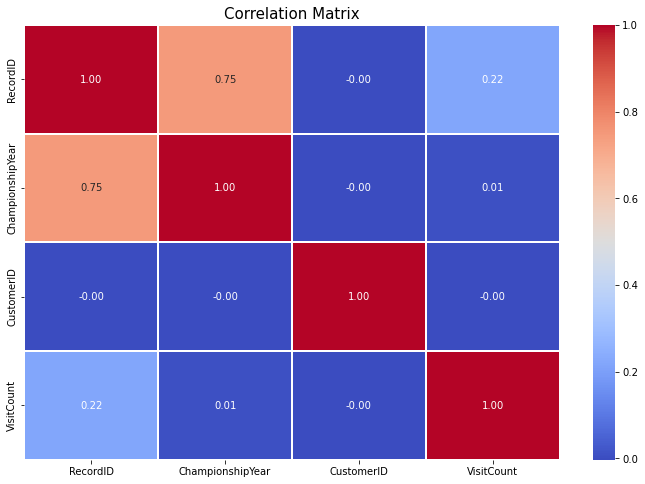

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)

# Add titles and labels for clarity
plt.title('Correlation Matrix', size=15)
plt.show()


# Preprocessing

In [3]:
# Mapping of institutions to states

# Function to update Facility State based on HostingInstitution
def update_facility_state(row):
    institution_to_state = {
    'Virginia Polytechnic Institute and State University': 'VA',
    'Villanova University': 'PA',
    'University of Tennessee, Knoxville': 'TN',
    'Louisiana State University': 'LA'
    }
    
    if row['HostingInstitution'] in institution_to_state:
        return institution_to_state[row['HostingInstitution']]
    else:
        return row['FacilityState']


# # Display the updated DataFrame
# print(training_data)

In [25]:
# Function to preprocess the dates and calculate days since first action and last purchase
def preprocess_dates(df, date_columns, drop_original=True):
    """
    Preprocess specified date columns in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - date_columns: List of column names to be processed as dates.
    
    Returns:
    - DataFrame with additional features based on the date columns.
    """
    current_date = pd.Timestamp(datetime.now())
    
    for col in date_columns:
        # Convert column to datetime format, coercing errors to NaT
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Compute the days since the date in the column
        days_since_col = f"DaysSince{col}"
        df[days_since_col] = (current_date - df[col]).dt.days
        
        # Fill missing values in the new column with -1
        df.fillna({days_since_col: -1}, inplace=True)
     # Optionally drop the original date columns
    if drop_original:
        df.drop(columns=date_columns, inplace=True)
    
    return df


# Apply preprocessing to include date-based features
#training_data = preprocess_dates(training_data)
# Load the training dataset
training_data_path = 'crossroads-classic-analytics-challenge-24/training_data_clean.csv'
training_data = pd.read_csv(training_data_path)
# # Load the test dataset
test_data_path = 'crossroads-classic-analytics-challenge-24/DIWBB_Test.csv'
test_data = pd.read_csv(test_data_path)

training_data['VisitCount'] = training_data.groupby('CustomerID')['CustomerID'].transform('count')
test_data['VisitCount'] = test_data.groupby('CustomerID')['CustomerID'].transform('count')

# Apply the function to each row
training_data['FacilityState'] = training_data.apply(update_facility_state, axis=1)
test_data['FacilityState'] = training_data.apply(update_facility_state, axis=1)


date_columns = ['CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate', 'EventBeginDate', 'EventEndDate']


training_data = convert_dates_to_days_and_save(training_data,date_columns)
test_data = convert_dates_to_days_and_save(test_data,date_columns)




training_data = preprocess_dates(training_data, date_columns)
test_data = preprocess_dates(test_data, date_columns)


df = training_data

# Calculate day differences
date_pairs = [
    ('DaysSinceCustomerFirstWBBActionDate', 'DaysSinceCustomerLastWBBActionDate', 'DaysBetweenFirstLastAction'),
    ('DaysSinceCustomerFirstWBBPurchaseDate', 'DaysSinceCustomerLastWBBPurchaseDate', 'DaysBetweenFirstLastPurchase'),
    ('DaysSinceEventBeginDate', 'DaysSinceEventEndDate', 'DaysBetweenEventBeginEnd')
]

for start_col, end_col, new_col in date_pairs:
    df[new_col] = (df[end_col] - df[start_col])
training_data = df


df = test_data

# Calculate day differences
date_pairs = [
    ('DaysSinceCustomerFirstWBBActionDate', 'DaysSinceCustomerLastWBBActionDate', 'DaysBetweenFirstLastAction'),
    ('DaysSinceCustomerFirstWBBPurchaseDate', 'DaysSinceCustomerLastWBBPurchaseDate', 'DaysBetweenFirstLastPurchase'),
    ('DaysSinceEventBeginDate', 'DaysSinceEventEndDate', 'DaysBetweenEventBeginEnd')
]

for start_col, end_col, new_col in date_pairs:
    df[new_col] = (df[end_col] - df[start_col])
test_data = df




print(training_data.columns)

# Selecting features to include in the model
#features_to_use = ['VisitCount','ChampionshipYear', 'CustomerState', 'CustomerCity', 'CustomerZipCode','IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior','DaysSinceCustomerFirstWBBActionDate','DaysSinceCustomerFirstWBBPurchaseDate', 'DaysSinceCustomerLastWBBActionDate', 'DaysSinceCustomerLastWBBPurchaseDate', 'DaysSinceEventBeginDate','DaysSinceEventEndDate', "HostingInstitution",'IsEventFinalSite''EventRoundName',"EventSession",'CustomerFirstWBBActionDateDayOfWeekName','CustomerFirstWBBPurchaseDateDayOfWeekName','CustomerLastWBBActionDateDayOfWeekName','CustomerLastWBBPurchaseDateDayOfWeekName','EventBeginDateDayOfWeekName', 'EventEndDateDayOfWeekName','DaysBetweenFirstLastAction', 'DaysBetweenFirstLastPurchase',
 #      'DaysBetweenEventBeginEnd','ActivityType']
# features_to_use = [
#     'VisitCount', 'ChampionshipYear', 'CustomerState', 'CustomerCity', 'CustomerZipCode',
#     'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
#     'DaysSinceCustomerFirstWBBActionDate', 'DaysSinceCustomerFirstWBBPurchaseDate',
#     'DaysSinceCustomerLastWBBActionDate', 'DaysSinceCustomerLastWBBPurchaseDate',
#     'DaysSinceEventBeginDate', 'DaysSinceEventEndDate', "HostingInstitution",
#     'EventRoundName', "IsEventFinalSite", "EventSession",
#     'CustomerFirstWBBActionDate_DayOfWeek', 'CustomerFirstWBBPurchaseDate_DayOfWeek',
#     'CustomerLastWBBActionDate_DayOfWeek', 'CustomerLastWBBPurchaseDate_DayOfWeek',
#     'EventBeginDate_DayOfWeek', 'EventEndDate_DayOfWeek', 'ActivityType'
# ]
# Prepare the data for modeling
#data_for_model = training_data[features_to_use].dropna(subset=['ActivityType'])
#Proceed with using the features_to_use for further analysis/modeling
data_for_model = training_data[features_to_use].dropna(subset=['ActivityType'])


X = data_for_model.drop('ActivityType', axis=1)
y = data_for_model['ActivityType']



C:\Users\piyus\AppData\Local\Temp\ipykernel_23036\1657944168.py:36: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data = pd.read_csv(training_data_path)


Index(['RecordID', 'ChampionshipYear', 'CustomerID', 'CustomerCity',
       'CustomerState', 'CustomerZipCode', 'CustomerInstitutionAffinity',
       'IsCustomerInNCAAMembership',
       'HasCustomerClickedOrOpenedEmailsSixMonthsPrior', 'EventRoundName',
       'IsEventFinalSite', 'EventSession', 'HostingInstitution',
       'FacilityName', 'FacilityDescription', 'FacilityCity', 'FacilityState',
       'FacilityZipCode', 'ActivityType', 'VisitCount',
       'CustomerFirstWBBActionDateDayOfWeekName',
       'CustomerFirstWBBPurchaseDateDayOfWeekName',
       'CustomerLastWBBActionDateDayOfWeekName',
       'CustomerLastWBBPurchaseDateDayOfWeekName',
       'EventBeginDateDayOfWeekName', 'EventEndDateDayOfWeekName',
       'DaysSinceCustomerFirstWBBActionDate',
       'DaysSinceCustomerFirstWBBPurchaseDate',
       'DaysSinceCustomerLastWBBActionDate',
       'DaysSinceCustomerLastWBBPurchaseDate', 'DaysSinceEventBeginDate',
       'DaysSinceEventEndDate', 'DaysBetweenFirstLastAction',
 

In [10]:
len(features_to_use)

27

In [9]:
len(training_data.columns)

35

C:\Users\piyus\AppData\Local\Temp\ipykernel_23036\1558993212.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corr()


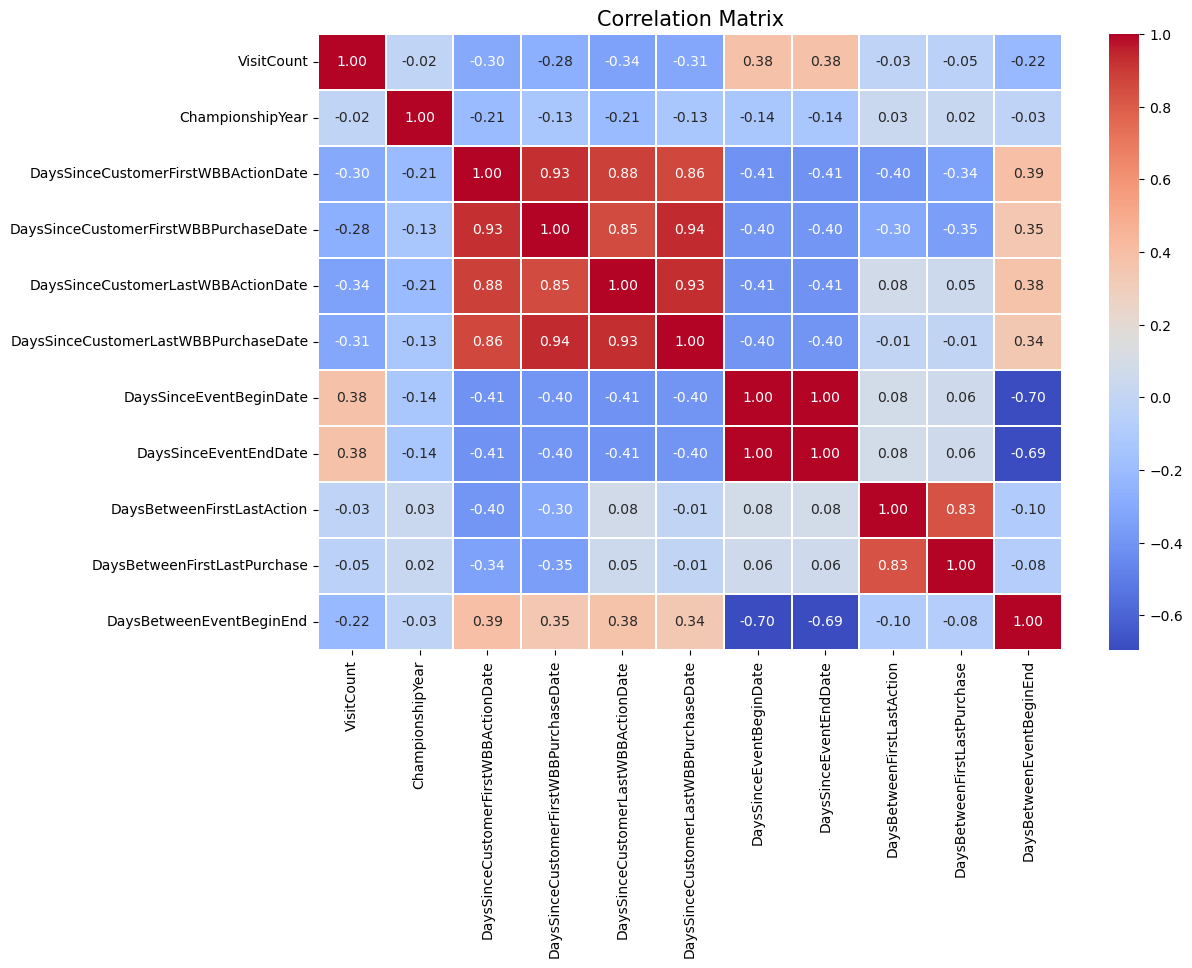

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = X.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)

# Add titles and labels for clarity
plt.title('Correlation Matrix', size=15)
plt.show()

In [27]:
# Assuming df is your DataFrame and features_to_use is your list of features
#features_to_use = ['VisitCount', 'ChampionshipYear', 'CustomerState', 'CustomerCity', 'DaysSinceCustomerFirstWBBActionDate', 'EventBeginDateDayOfWeekName']  # Example features

# Initialize empty lists to hold the names of categorical and numerical features
categorical_features = []
numerical_features = []

# Iterate over each feature in the list and check its data type in df
for feature in features_to_use:
    # Check if the feature exists in the DataFrame to avoid KeyError
    if feature in df.columns:
        if df[feature].dtype == 'object' or df[feature].dtype.name == 'category':
            categorical_features.append(feature)
        else:
            numerical_features.append(feature)

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['CustomerState', 'CustomerCity', 'CustomerZipCode', 'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior', 'HostingInstitution', 'EventRoundName', 'EventSession', 'CustomerFirstWBBActionDateDayOfWeekName', 'CustomerFirstWBBPurchaseDateDayOfWeekName', 'CustomerLastWBBActionDateDayOfWeekName', 'CustomerLastWBBPurchaseDateDayOfWeekName', 'EventBeginDateDayOfWeekName', 'EventEndDateDayOfWeekName', 'FacilityZipCode']
Numerical features: ['VisitCount', 'ChampionshipYear', 'DaysSinceCustomerFirstWBBActionDate', 'DaysSinceCustomerFirstWBBPurchaseDate', 'DaysSinceCustomerLastWBBActionDate', 'DaysSinceCustomerLastWBBPurchaseDate', 'DaysSinceEventBeginDate', 'DaysSinceEventEndDate', 'DaysBetweenFirstLastAction', 'DaysBetweenFirstLastPurchase', 'DaysBetweenEventBeginEnd']


In [28]:
# Encoding categorical variables and scaling numerical features
# categorical_features = ['CustomerState', 'CustomerState','CustomerCity', 'CustomerZipCode', 
#                         'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior','HostingInstitution','EventRoundName',"IsEventFinalSite","EventSession",'CustomerFirstWBBActionDateDayOfWeekName','CustomerFirstWBBPurchaseDateDayOfWeekName','CustomerLastWBBActionDateDayOfWeekName','CustomerLastWBBPurchaseDateDayOfWeekName','EventBeginDateDayOfWeekName', 'EventEndDateDayOfWeekName']
# numerical_features = ['VisitCount','ChampionshipYear', 'DaysSinceCustomerFirstWBBActionDate','DaysSinceCustomerFirstWBBPurchaseDate', 'DaysSinceCustomerLastWBBActionDate', 'DaysSinceCustomerLastWBBPurchaseDate', 'DaysSinceEventBeginDate','DaysSinceEventEndDate']  # Remove 'DaysSinceLastPurchase'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
# Define the RandomForestClassifier model

In [15]:
X_train

,VisitCount,ChampionshipYear,CustomerState,CustomerCity,CustomerZipCode,IsCustomerInNCAAMembership,HasCustomerClickedOrOpenedEmailsSixMonthsPrior,DaysSinceCustomerFirstWBBActionDate,DaysSinceCustomerFirstWBBPurchaseDate,DaysSinceCustomerLastWBBActionDate,...,EventSession,CustomerFirstWBBActionDateDayOfWeekName,CustomerFirstWBBPurchaseDateDayOfWeekName,CustomerLastWBBActionDateDayOfWeekName,CustomerLastWBBPurchaseDateDayOfWeekName,EventBeginDateDayOfWeekName,EventEndDateDayOfWeekName,DaysBetweenFirstLastAction,DaysBetweenFirstLastPurchase,DaysBetweenEventBeginEnd
112922,2,2023,UNK,(UNK),(UNK),No,No,3773.0,3773.0,3773.0,...,NaN,Monday,Monday,Monday,Monday,NaN,NaN,0.0,0.0,0.0
120206,1,2023,UNK,(UNK),(UNK),No,Yes,333.0,-1.0,333.0,...,NaN,Thursday,NaN,Thursday,NaN,NaN,NaN,0.0,0.0,0.0
101209,2,2023,UNK,(UNK),(UNK),No,(N/A),3773.0,3773.0,3773.0,...,NaN,Monday,Monday,Monday,Monday,NaN,NaN,0.0,0.0,0.0
172102,2,2023,SC,Hartsville,29550,No,Yes,2537.0,2537.0,2537.0,...,NaN,Friday,Friday,Friday,Friday,NaN,NaN,0.0,0.0,0.0
17201,2,2022,UNK,(UNK),(UNK),No,(N/A),3773.0,3773.0,3773.0,...,NaN,Monday,Monday,Monday,Monday,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,2,2023,UNK,(UNK),(UNK),No,(N/A),3773.0,3773.0,3773.0,...,NaN,Monday,Monday,Monday,Monday,NaN,NaN,0.0,0.0,0.0
117952,2,2023,UNK,(UNK),(UNK),No,(N/A),2157.0,2157.0,2157.0,...,NaN,Sunday,Sunday,Sunday,Sunday,NaN,NaN,0.0,0.0,0.0
173685,2,2023,TX,Arlington,76017,No,No,3773.0,3773.0,3773.0,...,NaN,Monday,Monday,Monday,Monday,NaN,NaN,0.0,0.0,0.0
43567,2,2022,UNK,(UNK),(UNK),No,(N/A),3773.0,3773.0,3773.0,...,NaN,Monday,Monday,Monday,Monday,NaN,NaN,0.0,0.0,0.0


# Random Forest

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Create a modeling pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Validate the model
y_pred = rf_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')

Validation accuracy: 0.9717200766913174


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [7]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Assuming your preprocessed data and labels are loaded correctly
# # X_train_preprocessed, X_val_preprocessed, y_train, y_val

# # Initialize the RandomForestClassifier with your specific hyperparameters
# model = RandomForestClassifier(n_estimators=332, max_depth=None, min_samples_leaf=1, min_samples_split=14, random_state=0)

# # Create a modeling pipeline
# rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('model', model)])
# # Train the model
# rf_pipeline.fit(X_train, y_train)

# # Validate the model
# y_pred = rf_pipeline.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Validation accuracy: {accuracy}')

Validation accuracy: 0.987456396043389


In [11]:
# Validate the model
y_pred = rf_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')

Validation accuracy: 0.9880776030964782


In [24]:
features_to_use = ['VisitCount','ChampionshipYear', 'CustomerState', 'CustomerCity', 'CustomerZipCode','IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior','DaysSinceCustomerFirstWBBActionDate','DaysSinceCustomerFirstWBBPurchaseDate', 'DaysSinceCustomerLastWBBActionDate', 'DaysSinceCustomerLastWBBPurchaseDate', 'DaysSinceEventBeginDate','DaysSinceEventEndDate', "HostingInstitution",'EventRoundName',"EventSession",'CustomerFirstWBBActionDateDayOfWeekName','CustomerFirstWBBPurchaseDateDayOfWeekName','CustomerLastWBBActionDateDayOfWeekName','CustomerLastWBBPurchaseDateDayOfWeekName','EventBeginDateDayOfWeekName', 'EventEndDateDayOfWeekName','DaysBetweenFirstLastAction', 'DaysBetweenFirstLastPurchase',
       'DaysBetweenEventBeginEnd','FacilityZipCode','ActivityType']

In [14]:
# Load the test dataset and prepare it for prediction
#test_data = pd.read_csv('/path/to/DIWBB_Test.csv')
#test_data = preprocess_dates(test_data,date_columns)

# Ensure the test data has the correct features
test_data_for_prediction = test_data[features_to_use[:-1]]  # Exclude 'ActivityType'

# Make predictions on the test dataset
test_predictions = rf_pipeline.predict(test_data_for_prediction)

# Prepare and save the submission file
submission_df = pd.DataFrame({'RecordID': test_data['RecordID'], 'ActivityType': test_predictions})
submission_df.to_csv('submission_random_forest.csv', index=False)

print('Submission file saved successfully.')

Submission file saved successfully.


# Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=4, random_state=42)

# Create a modeling pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', gb)])



In [9]:
# Train the model
gb_pipeline.fit(X_train, y_train)

# Validate the model
y_pred = gb_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')

Validation accuracy: 0.9860467338844555


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)

# Create a modeling pipeline
log_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', log_reg)])


In [15]:
# Train the model
log_pipeline.fit(X_train, y_train)

# Validate the model
y_pred = log_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')

Validation accuracy: 0.9868590815692646


# LightGBM

In [20]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.3 MB 2.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 2.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 2.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 2.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.5 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.3 MB 2.6 MB/s eta 0:00:01
   ---------------------------- ----------- 0.9/1.3 MB 2.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.1/1.3 MB 2.5 MB/s eta 0:00:01
   -------------------------------------

In [34]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Initialize the LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.01, max_depth=4, random_state=42)

# Create a modeling pipeline
lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', lgbm)])

In [35]:
# Train the model
lgbm_pipeline.fit(X_train, y_train)

# Validate the model
y_pred = lgbm_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3685
[LightGBM] [Info] Number of data points in the train set: 58412, number of used features: 1170
[LightGBM] [Info] Start training from score -5.628169
[LightGBM] [Info] Start training from score -0.215779
[LightGBM] [Info] Start training from score -6.914834
[LightGBM] [Info] Start training from score -1.863763
[LightGBM] [Info] Start training from score -4.486072
[LightGBM] [Info] Start training from score -3.765936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Validation accuracy: 0.9722678718159409


In [31]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [32]:
# Individual model pipelines

# Ensemble model with VotingClassifier
ensemble = VotingClassifier(
    estimators=[('gb', gb_pipeline), ('lr', log_pipeline), ('rf', rf_pipeline)],
    voting='soft'
)

# Assuming X_train, y_train are your training data and labels
ensemble.fit(X, y)

# Assuming X_val, y_val are your validation data and labels
y_pred = ensemble.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')


Validation accuracy: 0.9900712133662011


In [36]:
# Individual model pipelines

# Ensemble model with VotingClassifier
ensemble = VotingClassifier(
    estimators=[('gb', gb_pipeline), ('lr', log_pipeline), ('rf', rf_pipeline), ('lgbm',lgbm_pipeline )],
    voting='soft'
)

# Assuming X_train, y_train are your training data and labels
ensemble.fit(X, y)

# Assuming X_val, y_val are your validation data and labels
y_pred = ensemble.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4360
[LightGBM] [Info] Number of data points in the train set: 73016, number of used features: 1505
[LightGBM] [Info] Start training from score -5.653256
[LightGBM] [Info] Start training from score -0.215398
[LightGBM] [Info] Start training from score -6.921768
[LightGBM] [Info] Start training from score -1.863313
[LightGBM] [Info] Start training from score -4.491572
[LightGBM] [Info] Start training from score -3.775463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [24]:
# Individual model pipelines

# Ensemble model with VotingClassifier
ensemble1 = VotingClassifier(
    estimators=[('gb', gb_pipeline), ('lr', log_pipeline)],
    voting='soft'
)

# Assuming X_train, y_train are your training data and labels
ensemble1.fit(X, y)

# Assuming X_val, y_val are your validation data and labels
y_pred = ensemble1.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')


Validation accuracy: 0.9884359917809529


In [25]:
# Individual model pipelines

# Ensemble model with VotingClassifier
ensemble2 = VotingClassifier(
    estimators=[('gb', gb_pipeline), ('rf', rf_pipeline)],
    voting='soft'
)

# Assuming X_train, y_train are your training data and labels
ensemble2.fit(X, y)

# Assuming X_val, y_val are your validation data and labels
y_pred = ensemble2.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')


KeyboardInterrupt: 

In [26]:
# Individual model pipelines

# Ensemble model with VotingClassifier
ensemble3 = VotingClassifier(
    estimators=[('gb', gb_pipeline), ('rf', rf_pipeline), ('lgbm',lgbm_pipeline )],
    voting='soft'
)

# Assuming X_train, y_train are your training data and labels
ensemble3.fit(X, y)

# Assuming X_val, y_val are your validation data and labels
y_pred = ensemble3.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')


KeyboardInterrupt: 

In [ ]:
# Individual model pipelines

# Ensemble model with VotingClassifier
ensemble4 = VotingClassifier(
    estimators=[('gb', gb_pipeline), ('lr', log_pipeline), ('rf', rf_pipeline)],
    voting='hard'
)

# Assuming X_train, y_train are your training data and labels
ensemble4.fit(X, y)

# Assuming X_val, y_val are your validation data and labels
y_pred = ensemble4.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')


In [33]:
# Load the test dataset and prepare it for prediction
#test_data = pd.read_csv('/path/to/DIWBB_Test.csv')
#test_data = preprocess_dates(test_data,date_columns)

# Ensure the test data has the correct features
test_data_for_prediction = test_data[features_to_use[:-1]]  # Exclude 'ActivityType'

# Make predictions on the test dataset
test_predictions = ensemble.predict(test_data_for_prediction)

# Prepare and save the submission file
submission_df = pd.DataFrame({'RecordID': test_data['RecordID'], 'ActivityType': test_predictions})
submission_df.to_csv('submission_ensemble_new.csv', index=False)

print('Submission file saved successfully.')

Submission file saved successfully.


# ANN

In [18]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 11.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 85.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 81.9 MB/s et

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

/apps/spack/negishi/apps/anaconda/2022.10-py39-gcc-8.5.0-sjvibry/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-02-26 12:24:56.970149: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 12:24:56.998397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 12:24:56.998426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 12:24:56.999276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Atte

In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


# First, convert string labels to integer indices
encoder = LabelEncoder()
y_integers = encoder.fit_transform(y)

# Then, one-hot encode these integer labels
y_one_hot = to_categorical(y_integers)

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


# First, convert string labels to integer indices
encoder = LabelEncoder()
y_integers = encoder.fit_transform(y)

# Then, one-hot encode these integer labels
y_one_hot = to_categorical(y_integers)

# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X,y_one_hot, test_size=0.2, random_state=42)

# Apply the preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [11]:
# Save the preprocessed data
from joblib import dump, load
dump(X_train_transformed, 'X_train_transformed.joblib')
dump(X_test_transformed, 'X_test_transformed.joblib')

<167412x16759 sparse matrix of type '<class 'numpy.float64'>'
	with 4352712 stored elements in Compressed Sparse Row format>

In [3]:
from joblib import dump, load



# To load the data back
X_train_transformed_loaded = load('X_train_transformed.joblib')
X_test_transformed_loaded = load('X_test_transformed.joblib')


In [13]:
input_shape = [X_train_transformed_loaded.shape[1]]
print(input_shape)
#y_encoded.shape
y_one_hot
y_one_hot.shape[1]

[16759]


6

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout

# Determine the input shape dynamically
input_shape = [X_train_transformed_loaded.shape[1]]

num_classes = y_one_hot.shape[1]  # Assuming y_one_hot is your target variable

model = Sequential([
    # Input layer: Adjust 'input_shape' to match the number of features
    Dense(1024, activation='relu', input_shape=(16759,)),
    Dropout(0.50),  # Dropout layer to reduce overfitting
    Dense(512, activation='relu'),
    Dropout(0.50),  # Another Dropout layer
    Dense(256, activation='relu'),
    Dropout(0.50),  # Another Dropout layer
    Dense(128, activation='relu'),
    Dropout(0.50),  # Another Dropout layer
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17162240  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [16]:
X_train_dense = X_train_transformed_loaded.toarray()  # Convert sparse matrix to dense
X_test_dense = X_test_transformed_loaded.toarray()  # Convert sparse matrix to dense

In [11]:
X_train_dense.shape

(167412, 16759)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min', restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
]

#history = model.fit(X_train_dense, y_train_one_hot, epochs=30, batch_size=64, validation_split=0.2)

history = model.fit(X_train_dense, y_one_hot, epochs=100, batch_size=32, validation_split=0.2, verbose = 1,callbacks=callbacks)

In [22]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('best_model.h5')

# Assuming you have your test data prepared as X_test and y_test
# You need to preprocess your data in the exact same way you did before training



2024-02-25 13:47:17.268647: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [33]:
X_test_dense = X_test_transformed.toarray()

In [34]:
loss, accuracy = model.evaluate(X_test_dense, y_test_encoded)
print(f'Test Accuracy: {accuracy:.4f}')


1308/1308 [==============================] - 18s 14ms/step - loss: 6.0850 - accuracy: 0.9157
Test Accuracy: 0.9157


In [36]:
features_to_use = ['VisitCount','ChampionshipYear', 'CustomerState', 'CustomerCity', 'CustomerZipCode','IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior','DaysSinceCustomerFirstWBBActionDate','DaysSinceCustomerFirstWBBPurchaseDate', 'DaysSinceCustomerLastWBBActionDate', 'DaysSinceCustomerLastWBBPurchaseDate', 'DaysSinceEventBeginDate','DaysSinceEventEndDate', "HostingInstitution",'EventRoundName',"IsEventFinalSite","EventSession",'CustomerFirstWBBActionDateDayOfWeekName','CustomerFirstWBBPurchaseDateDayOfWeekName','CustomerLastWBBActionDateDayOfWeekName','CustomerLastWBBPurchaseDateDayOfWeekName','EventBeginDateDayOfWeekName', 'EventEndDateDayOfWeekName','DaysBetweenFirstLastAction', 'DaysBetweenFirstLastPurchase',
       'DaysBetweenEventBeginEnd']
data_for_test = test_data[features_to_use]
X_test_transformed = preprocessor.transform(data_for_test)
X_test_dense = X_test_transformed.toarray()  # Convert sparse matrix to dense

In [37]:
y_test = model.predict(X_test_dense)

655/655 [==============================] - 10s 15ms/step


In [40]:
y_testclasses = np.argmax(y_test,axis = 1)

In [43]:
y_class_names = encoder.inverse_transform(y_testclasses)

In [47]:
y_class_names

array(['No Activity', 'No Activity', 'No Activity', ..., 'No Activity',
       'No Activity', 'No Activity'], dtype=object)

In [48]:


# Prepare and save the submission file
submission_df = pd.DataFrame({'RecordID': test_data['RecordID'], 'ActivityType': y_class_names})
submission_df.to_csv('submission_ANN.csv', index=False)

print('Submission file saved successfully.')

Submission file saved successfully.


In [ ]:
submission_df.to_csv('submission_2.csv', index=False)

print('Submission file saved successfully.')

In [ ]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt']
}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


In [ ]:
best_model = grid_search.best_estimator_


In [ ]:
current_date = pd.Timestamp(datetime.now())

In [ ]:
pd.Timedelta(days=10)

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the training dataset
# Assume preprocess_dates(df) function is defined as before

# Apply preprocessing to include date-based features
training_data = preprocess_dates(training_data)

# Selecting features to include in the model
features_to_use = ['ChampionshipYear', 'CustomerState', 'CustomerCity', 'CustomerZipCode',
                   'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
                   'DaysSinceFirstAction', 'DaysSinceLastPurchase', 'ActivityType']

# Prepare the data for modeling
data_for_model = training_data[features_to_use].dropna(subset=['ActivityType'])

X = data_for_model.drop('ActivityType', axis=1)
y = data_for_model['ActivityType']

# Encoding categorical variables and scaling numerical features
categorical_features = ['CustomerState', 'CustomerCity', 'CustomerZipCode', 
                        'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior']
numerical_features = ['ChampionshipYear', 'DaysSinceFirstAction', 'DaysSinceLastPurchase']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the XGBClassifier model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)

# Create a modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets using the encoded target
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Train the model using the encoded labels
pipeline.fit(X_train, y_train_encoded)

# Validate the model using the encoded labels
y_pred_encoded = pipeline.predict(X_val)

# Convert predicted labels back to original string labels if needed
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy using the encoded labels for consistency
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f'Validation accuracy: {accuracy}')

# Prepare the test dataset for prediction
test_data = preprocess_dates(test_data)

# Ensure the test data has the correct features
test_data_for_prediction = test_data[features_to_use[:-1]]  # Exclude 'ActivityType'

# Make predictions on the test dataset
test_predictions_encoded = pipeline.predict(test_data_for_prediction)

# Convert predictions back to original labels for submission
test_predictions = label_encoder.inverse_transform(test_predictions_encoded)

# Prepare and save the submission file
submission_df = pd.DataFrame({'RecordID': test_data['RecordID'], 'ActivityType': test_predictions})
submission_df.to_csv('submission.csv', index=False)

print('Submission file saved successfully.')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a new pipeline with XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgb_model)])

# Define a grid of hyperparameters to search
param_grid = {
    'model__learning_rate': [0.001,0.05,0.01,0.006],
    'model__max_depth': [3, 2, 4,5],
    'model__n_estimators': [50,100,150, 200]
}

# Set up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# You can also use the best estimator directly to make predictions
y_pred_encoded = grid_search.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f'Validation accuracy with best model: {accuracy}')


In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming preprocess_dates function and loading of data as before

# Define the best-fit parameters (replace placeholder values with actual best-fit parameters)
best_params = {
    'learning_rate': 0.001,  # Example placeholder value
    'max_depth': 5,        # Example placeholder value
    'n_estimators': 150,   # Example placeholder value
}

# Create the XGBClassifier model with best-fit parameters
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0,
    **best_params
)

# Create a modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train the model on the entire dataset using the encoded labels
pipeline.fit(X, y_encoded)

# Load and preprocess the test dataset
#test_data = pd.read_csv('/path/to/DIWBB_Test.csv')
test_data = preprocess_dates(test_data)

# Ensure the test data has the correct features for prediction
test_data_for_prediction = test_data[features_to_use[:-1]]  # Exclude 'ActivityType'

# Make predictions on the test dataset
test_predictions_encoded = pipeline.predict(test_data_for_prediction)

# Convert predictions back to original string labels for the submission
test_predictions = label_encoder.inverse_transform(test_predictions_encoded)

# Prepare the submission file
submission_df = pd.DataFrame({'RecordID': test_data['RecordID'], 'ActivityType': test_predictions})

# Save the submission file
submission_df.to_csv('submission_file.csv', index=False)

print('Submission file saved successfully.')


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the training data
# training_data_path = '/path/to/your/DIWBB_Training.csv'
# training_data = pd.read_csv(training_data_path)

# Assuming preprocess_dates and other preprocessing functions are defined as before

# Apply preprocessing to the dataset
training_data = preprocess_dates(training_data)

# Define features and target
features_to_use = ['ChampionshipYear', 'CustomerState', 'CustomerCity', 'CustomerZipCode',
                   'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
                   'DaysSinceFirstAction', 'DaysSinceLastPurchase']
target = 'ActivityType'

X = training_data[features_to_use]
y = training_data[target]

# Encoding the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Defining the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['ChampionshipYear', 'DaysSinceFirstAction', 'DaysSinceLastPurchase']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['CustomerState', 'CustomerCity', 'CustomerZipCode',
                                                         'IsCustomerInNCAAMembership', 
                                                         'HasCustomerClickedOrOpenedEmailsSixMonthsPrior'])
    ])

# Defining the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Creating the VotingClassifier ensemble
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

# Creating a pipeline with the preprocessor and the ensemble model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('ensemble', ensemble_model)])

# Training the ensemble model
pipeline.fit(X_train, y_train)

# Predicting on the validation set
y_pred = pipeline.predict(X_val)

# Calculating the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')




In [ ]:
import pandas as pd

# Load your dataset
# training_data_path = 'DIWBB_Training.csv'
# training_data = pd.read_csv(training_data_path)

# Find rows with at least one missing value
rows_with_missing_values = training_data[training_data.isnull().any(axis=1)]

# Display the rows with missing values
print(rows_with_missing_values)

# If you want to know the count of rows with missing values
print(f"Number of rows with at least one missing value: {len(rows_with_missing_values)}")


In [ ]:
missing_values_data_path = 'missing_values_data.csv'
rows_with_missing_values.to_csv(missing_values_data_path, index=False)

print(f"DataFrame with missing values saved to: {missing_values_data_path}")

In [ ]:
def basic_eda(df):
    print("-------------------------------TOP 5 RECORDS-----------------------------")
    print(df.head(5))
    print()
    
    print("-------------------------------INFO--------------------------------------")
    print(df.info())
    print()
    
    print("-------------------------------Describe----------------------------------")
    print(df.describe())
    print()
    
    print("-------------------------------Columns-----------------------------------")
    print(df.columns)
    print()
    
    print("-------------------------------Data Types--------------------------------")
    print(df.dtypes)
    print()
    
    print("----------------------------Missing Values-------------------------------")
    print(df.isnull().sum())
    print()
    
    print("----------------------------NULL values----------------------------------")
    print(df.isna().sum())
    print()
    
    print("--------------------------Shape Of Data---------------------------------")
    print(df.shape)
    print()
    
    print("============================================================================ \n")

In [ ]:
basic_eda(df)

In [ ]:
df.ActivityType.unique()

In [ ]:
def unique_value_in_dataframe(d):
    col=[]
    for column in d:
        if d[column].dtypes == 'object':
            print(f'{column} : {d[column].unique()}')
            col.append(column)
    print(col)

In [ ]:
unique_value_in_dataframe(df)


In [ ]:
# Drop rows with null values
df_cleaned = df.dropna()

# Print the shape of the cleaned dataframe to see how many rows remain
print("Shape of the cleaned dataframe after removing null values:", df_cleaned.shape)

In [ ]:
unique_value_in_dataframe(df_cleaned)

In [ ]:
# Assuming your dataset is stored in a variable named 'df'

# List of columns to check
columns_to_check = [
    'EventRoundName', 'IsEventFinalSite', 'EventSession',
    'EventBeginDate', 'EventEndDate', 'HostingInstitution',
    'FacilityName', 'FacilityDescription', 'FacilityCity',
    'FacilityState', 'FacilityZipCode'
]

# Display the top 20 rows for the specified columns
print(df[columns_to_check].head(50))


In [ ]:
# Assuming your dataset is stored in a variable named 'df'

# Check if all values in each column are the same
same_values_mask = (df[columns_to_check].apply(lambda x: x == x.iloc[0])).all(axis=1)

# Count the number of rows where all values are the same across the specified columns
num_rows_same_values = same_values_mask.sum()

print("Number of rows where all values in the specified columns are the same:", num_rows_same_values)


In [ ]:
# Check if all values in each column are the same, including NaN values
same_values_mask = (df[columns_to_check].apply(lambda x: x.fillna(method='ffill').equals(x.fillna(method='ffill').iloc[0])))

# Count the number of columns where all values are the same across the specified columns, including NaN values
num_columns_same_values = same_values_mask.sum()

print("Number of columns where all values in each column are the same, including NaN values:", num_columns_same_values)


In [ ]:
l = df['EventRoundName']
p = df["IsEventFinalSite"]

print(len(l))
print(len(p))
q=0
for i in range(len(l)):
    if(l[i] == p[i]):
        q+=1
        
print(q)          

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data into a DataFrame
# Replace 'data.csv' with your actual file path or DataFrame variable
df = df_cleaned

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['CustomerCity', 'CustomerState','CustomerZipCode', 'CustomerInstitutionAffinity', 'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior','EventRoundName', 'IsEventFinalSite', 'EventSession', 'EventBeginDate', 'HostingInstitution', 'ActivityType']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Now df contains encoded categorical variables
# You can use df for further processing or modeling


In [ ]:
label_mapping = {}
for col in categorical_columns:
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print label mapping
print(label_mapping)

In [ ]:
df.head(5)

In [ ]:
import pandas as pd

# Assuming these are your date columns in your DataFrame df
date_columns = ['CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate']

# Convert to datetime format
for column in date_columns:
    df[column] = pd.to_datetime(df[column])

# Extract relevant features
for column in date_columns:
    df[column + '_Year'] = df[column].dt.year
    df[column + '_Month'] = df[column].dt.month
    df[column + '_Day'] = df[column].dt.day
    df[column + '_DayOfWeek'] = df[column].dt.dayofweek
    df[column + '_DayOfYear'] = df[column].dt.dayofyear

# Normalize extracted features
# You can use techniques like Min-Max scaling or Standardization
# Example using Min-Max scaling:
for column in df.columns:
    if 'Year' in column or 'Month' in column or 'Day' in column or 'DayOfWeek' in column or 'DayOfYear' in column:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Drop the original date columns if no longer needed
df.drop(columns=date_columns, inplace=True)

# Now df contains the preprocessed date features along with other encoded categorical variables
# You can use df for further processing or modeling


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import joblib

# Load the dataset
# Assuming your dataset is stored in a variable named 'df'
# df = pd.read_csv('your_dataset.csv')

# Drop 'RecordID' column
#df = df.drop(columns=['RecordID'])

# Define the input columns and the target column
X = df.drop(columns=['ActivityType'])
y = df['ActivityType']

# Convert categorical target to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the fitted scaler
joblib.dump(scaler, 'standard_scaler.pkl')

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)


In [ ]:
test_data = pd.read_csv("crossroads-classic-analytics-challenge-24/DIWBB_Test.csv")
X_test.head()

In [ ]:
import joblib

# Assuming 'scaler' is your fitted StandardScaler instance
# Save the scaler to a file
joblib.dump(scaler, 'standard_scaler.pkl')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data into a DataFrame
# Replace 'data.csv' with your actual file path or DataFrame variable
df = test_data

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['CustomerCity', 'CustomerState','CustomerZipCode', 'CustomerInstitutionAffinity', 'IsCustomerInNCAAMembership', 'HasCustomerClickedOrOpenedEmailsSixMonthsPrior','EventRoundName', 'IsEventFinalSite', 'EventSession', 'EventBeginDate','EventEndDate', 'HostingInstitution', 'FacilityName','FacilityDescription', 'FacilityCity', 'FacilityState','FacilityZipCode']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
import pandas as pd

# Assuming these are your date columns in your DataFrame df
date_columns = ['CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate']

# Convert to datetime format
for column in date_columns:
    df[column] = pd.to_datetime(df[column])

# Extract relevant features
for column in date_columns:
    df[column + '_Year'] = df[column].dt.year
    df[column + '_Month'] = df[column].dt.month
    df[column + '_Day'] = df[column].dt.day
    df[column + '_DayOfWeek'] = df[column].dt.dayofweek
    df[column + '_DayOfYear'] = df[column].dt.dayofyear

# Normalize extracted features
# You can use techniques like Min-Max scaling or Standardization
# Example using Min-Max scaling:
for column in df.columns:
    if 'Year' in column or 'Month' in column or 'Day' in column or 'DayOfWeek' in column or 'DayOfYear' in column:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Drop the original date columns if no longer needed
df.drop(columns=date_columns, inplace=True)

# Now df contains the preprocessed date features along with other encoded categorical variables
# You can use df for further processing or modeling


In [ ]:
import pandas as pd
import joblib

# Load the test data
test_data = df

# Load the trained scaler
scaler = joblib.load('standard_scaler.pkl')  # Load the fitted scaler instead of creating a new one




In [ ]:
# Assuming you have already preprocessed the test data similarly to the training data
# Standardize the input features using the pre-fitted scaler
X_test_scaled = scaler.transform(test_data)

# Assuming 'model' is your trained model
# Perform predictions
predictions = model.predict(X_test_scaled)


In [ ]:
# Get the index of the highest probability for each prediction
predicted_labels_index = np.argmax(predictions, axis=1)


In [ ]:

# Add the predicted labels to the test data
test_data['Predicted_ActivityType'] = predicted_activity_types

# Save the test data with predictions to a CSV file
test_data.to_csv('test_predictions_sub.csv', index=False)

In [ ]:
label_mapping = {0:'Multiple Activities', 1:'Primary Purchase', 2:'Secondary Purchase',3: 'Transfer Recipient'}# Adjust this according to your label encoding mapping

# Map the index back to the original categorical variables
predicted_activity_types = [label_mapping[label] for label in predicted_labels_index]

# Add the predicted labels to the test data
test_data['Predicted_ActivityType'] = predicted_activity_types

# Save the predictions to a CSV file
test_data.to_csv('predictions.csv', index=False)